In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
%matplotlib notebook

In [2]:
cuda1_files = [f for f in listdir("../build_cuda_1/") if "clustercount" in f and "_5_" in f]
cuda1_clustercount = [int(f[12:].split("_")[0]) for f in cuda1_files]
cuda1_means = []
cuda1_stddev = []

omp_files = [f for f in listdir("../build_omp/") if "clustercount" in f and "_5_" in f]
omp_clustercount = [int(f[12:].split("_")[0]) for f in omp_files]
omp_means = []
omp_stddev = []

In [3]:
for i in range(len(cuda1_clustercount)):
    d = np.loadtxt("../build_cuda_1/" + cuda1_files[i])/1000000000.
    cuda1_means += [np.mean(d[1:])]
    cuda1_stddev += [np.std(d[1:])]
    
for i in range(len(omp_clustercount)):
    d = np.loadtxt("../build_omp/" + omp_files[i])/1000000000.
    omp_means += [np.mean(d[1:])]
    omp_stddev += [np.std(d[1:])]

In [4]:
cuda1_means = np.array(cuda1_means)
cuda1_clustercount = np.array(cuda1_clustercount)
cuda1_min_elem = cuda1_means[np.where(cuda1_clustercount == 0)][0]

omp_means = np.array(omp_means)
omp_clustercount = np.array(omp_clustercount)
omp_min_elem = omp_means[np.where(omp_clustercount == 0)][0]

<IPython.core.display.Javascript object>


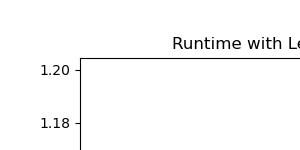

In [5]:
plt.figure(1)
plt.scatter(cuda1_clustercount, cuda1_means, label="CUDA")
plt.scatter(omp_clustercount, omp_means, label="OpenMP")
plt.xlabel("Amount of Cluster Centers [in % of Total Pixels]")
plt.ylabel("Runtime [in s]")
plt.title("Runtime with Levels of Cluster Usage")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


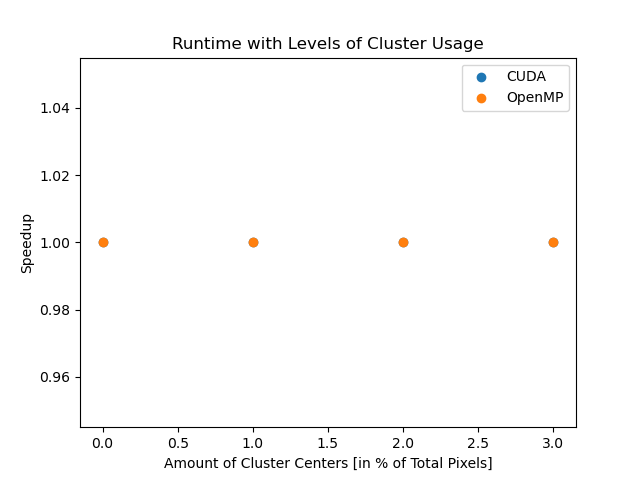

In [6]:
plt.figure(2)
plt.scatter(cuda1_clustercount, cuda1_means/cuda1_min_elem, label="CUDA")
plt.scatter(omp_clustercount, omp_means/omp_min_elem, label="OpenMP")
plt.xlabel("Amount of Cluster Centers [in % of Total Pixels]")
plt.ylabel("Speedup")
plt.title("Runtime with Levels of Cluster Usage")
plt.legend()
plt.show()